## Logistic regression

## Introduction to the data
- Read admissions.csv into a Dataframe named admissions.
- Use the Matplotlib method scatter to generate a scatter plot with the:
    - gpa column on the x-axis.
    - admit column on the y-axis.
- Use plt.show() to display the scatter plot.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
admissions = pd.read_csv("admissions.csv")

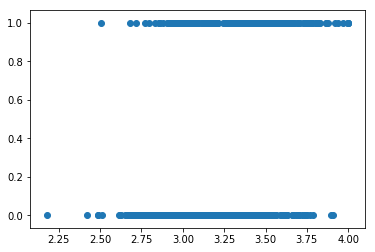

In [4]:
plt.scatter(admissions["gpa"],admissions["admit"])
plt.show()

In [5]:
admissions

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894
5,0,3.599108,442.763567
6,0,3.238972,667.472189
7,0,3.420177,561.713905
8,0,3.562482,590.340371
9,0,3.910495,463.470183


## Logistic function

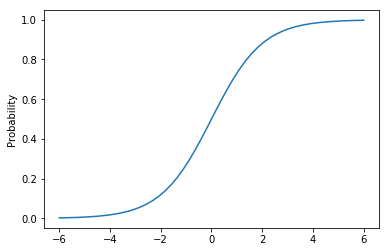

In [6]:
import numpy as np

# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

## Training a logistic regression model

- Import the LogisticRegression class and instantiate a model named logistic_model.
- Use the LogisticRegression method fit to fit the model to the data. We're only interested in constructing a model that uses gpa values to predict admit values.
- View the documentation for the LogisticRegression class if you get stuck.

In [7]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Plotting probabilities

- Use the LogisticRegression method predict_proba to return the predicted probabilities for the data in the gpa column. Assign the returned probabilities to pred_probs.

- Create and display a scatter plot using the Matplotlib scatter function where:

    - the x-axis is the values in the gpa column,
    - the y-axis is the probability of being classified as label 1.

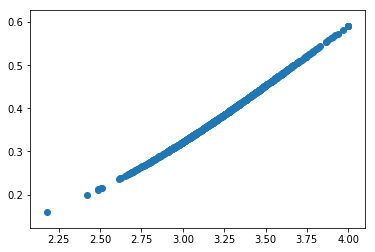

In [8]:
pred_probs= logistic_model.predict_proba(admissions[["gpa"]])
# Probability that the row belongs to label `0`.
pred_probs[:,0]
# Probabililty that the row belongs to label `1`.
pred_probs[:,1]
plt.scatter(admissions["gpa"],pred_probs[:,1])

In [9]:
print(pred_probs)

[[0.63387918 0.36612082]
 [0.57129471 0.42870529]
 [0.74047131 0.25952869]
 ...
 [0.64994531 0.35005469]
 [0.53382227 0.46617773]
 [0.53831911 0.46168089]]


## Predict labels

- Use the LogisticRegression method predict to return the predicted for each label in the training set.

 - The parameter for the predict method matches that of the predict_proba method:
        - X: rows of data to use for prediction.
        - Assign the result to fitted_labels.
- Use the print function to display the first 10 values in fitted_labels.

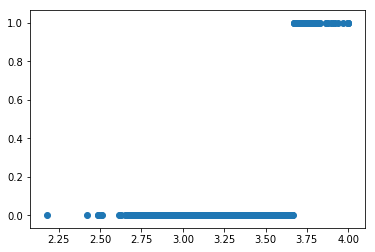

In [10]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
fitted_labels= logistic_model.predict(admissions[["gpa"]])
# Probability that the row belongs to label `0`.
plt.scatter(admissions["gpa"], fitted_labels)


In [11]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
admit    644 non-null int64
gpa      644 non-null float64
gre      644 non-null float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


## Introduction to evaluating binary classifiers

- Use the LogisticRegression method predict to return the label for each observation in the dataset, admissions. Assign the returned list to labels.
- Add a new column to the admissions Dataframe named predicted_label that contains the values from labels.
- Use the Series method value_counts and the print function to display the distribution of the values in the predicted_label column.
- Use the Dataframe method head and the print function to display the first 5 rows in admissions.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

admissions = pd.read_csv("admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
labels = model.predict(admissions[["gpa"]])
admissions["predicted_label"] = labels
print(admissions["predicted_label"].value_counts())


0    598
1     46
Name: predicted_label, dtype: int64


# Accuracy

- Rename the admit column from the admissions Dataframe to actual_label so it's more clear which column contains the predicted labels (predicted_label) and which column contains the actual labels (actual_label).
- Compare the predicted_label column with the actual_label column.
Use a double equals sign (==) to compare the 2 Series objects and assign the resulting Series object to matches.
    - Use conditional filtering to filter admissions to just the rows where matches is True. Assign the resulting Dataframe to correct_predictions.
- Display the first 5 rows in correct_predictions to make sure the values in the predicted_label and actual_label columns are equal.
- Calculate the accuracy and assign the resulting float value to accuracy.
    - Display accuracy using the print function.


In [14]:
#admissions["actual_label"] = admissions["admit"]
matches = admissions["predicted_label"] == admissions["actual_label"]
correct_predictions = admissions[matches]
print(correct_predictions.head())
accuracy = correct_predictions.shape[0] / admissions.shape[0]
print(accuracy)
    

KeyError: 'actual_label'

## Binary classification outcome

- Extract all of the rows where predicted_label and actual_label both equal 1. Then, calculate the number of true positives and assign to true_positives.

- Extract all of the rows where predicted_label and actual_label both equal 0. Then, calculate the number of true negatives and assign to true_negatives.

- Display both true_positives and true_negatives.

In [ ]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

print(true_positives)
print(true_negatives)

## Sensitivity

- Calculate the number of false negatives (where the model predicted rejected but the student was actually admitted) and assign to false_negatives.
- Calculate the sensitivity and assign the computed value to sensitivity.
- Display sensitivity.


In [ ]:
false_negative_filter= (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives=len(false_negative_filter)
sensitivity=true_positives / (true_positives + false_negatives)
print(sensitivity)


## Specificity

In [ ]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])
false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])
specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)

## Multiclass classification

## Introduction of the data

- Import the Pandas library and read auto.csv into a Dataframe named cars.

- Use the Series.unique() method to assign the unique elements in the column origin to unique_regions. Then use the print function to display unique_regions.

In [2]:
import pandas as pd
cars = pd.read_csv("auto.csv")


In [3]:
unique_regions=cars["origin"].unique()
unique_regions

array([1, 3, 2], dtype=int64)

## Dummy variables

- Use the pandas.get_dummies() function to create dummy values from the year column.

    - Use the prefix attribute to prepend year to each of the resulting column names.
    - Assign the resulting Dataframe to dummy_years.
- Use the pandas.concat() function to concatenate the columns from dummy_years to cars.
- Use the DataFrame.drop() method to drop the year and cylinders columns from cars.
- Display the first 5 rows of the new cars Dataframe to confirm.


In [4]:
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)
dummy_years = pd.get_dummies(cars["year"], prefix="year")
cars = pd.concat([cars, dummy_years], axis=1)
cars=cars.drop(columns=["cylinders","year"],axis=1)
cars.head()


,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,307.0,130.0,3504.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Multiclass classification

- Split the shuffled_cars Dataframe into 2 Dataframes: train and test.
- Assign the first 70% of the shuffled_cars to train.
- Assign the last 30% of the shuffled_cars to test.

In [5]:
shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows]

In [6]:
shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows]
slip=int(cars.shape[0] * 0.7)
train=shuffled_cars.iloc[0:slip]
test=shuffled_cars.iloc[slip:]

shuffled_rows

In [7]:
cars.index

RangeIndex(start=0, stop=392, step=1)

## Training a multiclass logistic regression model

For each value in unique_origins, train a logistic regression model with the following parameters:

- X: Dataframe containing just the cylinder & year binary columns.
- y: list (or Series) of Boolean values:
    - True if observation's value for origin matches the current iterator variable.
    - False if observation's value for origin doesn't match the current iterator variable.

Add each model to the models dictionary with the following structure:

    - key: origin value (1, 2, or 3),
    - value: relevant LogistcRegression model instance.


In [8]:
from sklearn.linear_model import LogisticRegression

unique_origins = cars["origin"].unique()
unique_origins.sort()

models = {}
features = [c for c in train.columns if c.startswith("cyl") or c.startswith("year")]
        

for origin in unique_origins:
    model = LogisticRegression()
    
    X_train = train[features]
    y_train = train["origin"] == origin

    model.fit(X_train, y_train)
    models[origin] = model

In [9]:
models

{1: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 2: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 3: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False)}

## Testing the model

For each origin value from unique_origins:

Use the LogisticRegression predict_proba function to return the 3 lists of predicted probabilities for the test set and add to the testing_probs Dataframe.
Here's how the final Dataframe should look like (without all zeroes of course!):


In [10]:
testing_probs = pd.DataFrame(columns=unique_origins)  

for origin in unique_origins:
    # Select testing features.
    X_test = test[features]   
    # Compute probability of observation being in the origin.
    testing_probs[origin] = models[origin].predict_proba(X_test)[:,1]

## Chose the origin

- Classify each observation in the test set using the testing_probs Dataframe.
- Assign the predicted origins to predicted_origins and use the print function to display it.


In [11]:
predicted_origins = testing_probs.idxmax(axis=1)

## Overfitting


In [12]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

## Bias variance tradeoff

- Create a function named train_and_test that:

    - Takes in a list of column names in filtered_cars as the sole parameter (cols),
    - Trains a linear regression model using:
        - The columns in cols as the features,
        - The mpg column as the target variable.
    - Uses the trained model to make predictions using the same input it was trained on,
    - Computes the variance of the predicted values and the mean squared error between the predicted values and the actual label (mpg column).
    - Returns the mean squared error value followed by the variance (e.g. return(mse, variance)).
- Use the train_and_test function to train a model using only the cylinders column. Assign the resulting mean squared error value and variance to cyl_mse and cyl_var.

- Use the train_and_test function to train a model using only the weight column. Assign the resulting mean squared error value and variance to weight_mse and weight_var.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
def train_and_test(cols):
    features=cols
    target=filtered_cars["mpg"]
    model=LinearRegression()
    model.fit(features,target)
    y_predict=model.predict(features)
    variance=np.var(y_predict)
    mse=mean_squared_error(y_predict,target)
    return(mse, variance)

cyl_mse,cyl_var=train_and_test(filtered_cars[["cylinders"]])
weight_mse,weight_var=train_and_test(filtered_cars[["weight"]])
  
    

In [14]:
weight_var

42.08612184489641

## Multivariance model

Use the train_and_test function to train linear regression models using the following columns as the features:

- columns: cylinders, displacement.
    - MSE: two_mse, variance: two_var.
- columns: cylinders, displacement, horsepower.
    - MSE: three_mse, variance: three_var.
- columns: cylinders, displacement, horsepower, weight.
    - MSE: four_mse, variance: four_var.
- columns: cylinders, displacement, horsepower, weight, acceleration.
    - MSE: five_mse, variance: five_var.
- columns: cylinders, displacement, horsepower, weight, acceleration, model year
    - MSE: six_mse, variance: six_var.
- columns: cylinders, displacement, horsepower, weight, acceleration, model year, origin
    - MSE: seven_mse, variance: seven_var.
Use print statements or the variable inspector to display each value.

In [15]:
two_mse,two_var=train_and_test(filtered_cars[["cylinders", "displacement"]])
three_mse,three_var=train_and_test(filtered_cars[["cylinders", "displacement","horsepower"]])
four_mse,four_var=train_and_test(filtered_cars[["cylinders", "displacement","horsepower","weight"]])
five_mse,five_var=train_and_test(filtered_cars[["cylinders", "displacement","horsepower","weight","acceleration"]])
six_mse,six_var=train_and_test(filtered_cars[["cylinders", "displacement","horsepower","weight","acceleration","model year"]])
seven_mse,seven_var=train_and_test(filtered_cars[["cylinders", "displacement","horsepower","weight","acceleration","model year","origin"]])




In [16]:
lista= [two_mse,two_var,three_mse,three_var,four_mse,four_var,five_mse,five_var,six_mse,six_var,seven_mse,seven_var]
lista1 = []
for i in lista:
    lista1.append(i)
test=lista1
test = pd.DataFrame({'col':lista1})

In [17]:
test

,col
0,21.282057
1,39.480681
2,20.252955
3,40.509784
4,17.763861
5,42.998878
6,17.761396
7,43.001342
8,11.590171
9,49.172567


## Cross validation

Create a function named train_and_cross_val that:

- takes in a single parameter (list of column names),
- trains a linear regression model using the features specified in the parameter,
- uses the KFold class to perform 10-fold validation using a random seed of 3 (we use this seed to answer check your code),
- calculates the mean squared error across all folds and the mean variance across all folds.
- returns the mean squared error value then the variance using a multiple return statement (e.g. return(avg_mse, avg_var)).

Use the train_and_cross_val function to train linear regression models using the following columns as the features:

- the cylinders and displacement columns. Assign the resulting mean squared error value to two_mse and the resulting variance value to two_var.
- the cylinders, displacement, and horsepower columns. Assign the resulting mean squared error value to three_mse and the resulting variance value to three_var.
- the cylinders, displacement, horsepower, and weight columns. Assign the resulting mean squared error value to four_mse and the resulting variance value to four_var.
- the cylinders, displacement, horsepower, weight, acceleration columns. Assign the resulting mean squared error value to five_mse and the resulting variance value to five_var.
- the cylinders, displacement, horsepower, weight, acceleration, and model year columns. Assign the resulting mean squared error value to six_mse and the resulting variance value to six_var.
- the cylinders, displacement, horsepower, weight, acceleration, model year, and origin columns. Assign the resulting mean squared error value to seven_mse and the resulting variance value to seven_var.

Use the variable display to inspect each value.

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
def train_and_cross_val(cols):
    features=cols
    target=filtered_cars["mpg"]
    model=LinearRegression()
    y_test=model.fit(features,target)
    kfold=KFold(n_splits=10, random_state=3, shuffle=False)
    kfold.get_n_splits(features) 
    y_predict=model.predict(features)
    variance=np.var(y_predict)
    mse=mean_squared_error(y_predict,target)
    avg_var=np.mean(variance)
    avg_mse=mse
    return(avg_mse, avg_var)

two_mse,two_var=train_and_cross_val(filtered_cars[["cylinders", "displacement"]])
three_mse,three_var=train_and_cross_val(filtered_cars[["cylinders", "displacement","horsepower"]])
four_mse,four_var=train_and_cross_val(filtered_cars[["cylinders", "displacement","horsepower","weight"]])
five_mse,five_var=train_and_cross_val(filtered_cars[["cylinders", "displacement","horsepower","weight","acceleration"]])
six_mse,six_var=train_and_cross_val(filtered_cars[["cylinders", "displacement","horsepower","weight","acceleration","model year"]])
seven_mse,seven_var=train_and_cross_val(filtered_cars[["cylinders", "displacement","horsepower","weight","acceleration","model year","origin"]])
    
    
    

## Cross validation

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
    
    # KFold instance.
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    
    # Iterate through over each fold.
    for train_index, test_index in kf.split(features):
        # Training and test sets.
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index],target.iloc[test_index]
        
        # Fit the model and make predictions.
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        # Calculate mse and variance values for this fold.
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)

        # Append to arrays to do calculate overall average mse and variance values.
        variance_values.append(var)
        mse_values.append(mse)
   
    # Compute average mse and variance values.
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)

two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

In [24]:
seven_var

49.90431373098729

##  Plotting cross-validation error vs. cross-validation variance

- On the same Axes instance:

    - Generate a scatter plot with the model's number of features on the x-axis and the model's overall, cross-validation mean squared error on the y-axis. Use red for the scatter dot color.
    - Generate a scatter plot with the model's number of features on the x-axis and the model's overall, cross-validation variance on the y-axis. Use blue for the scatter dot color.
    
- Use plt.show() to display the scatter plot.

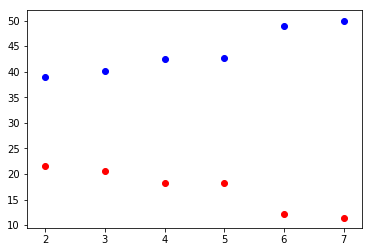

In [27]:
# We've hidden the `train_and_cross_val` function to save space but you can still call the function!
import matplotlib.pyplot as plt
        
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], c='red')
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var, five_var, six_var, seven_var], c='blue')
plt.show()

In [26]:
features

['cyl_3',
 'cyl_4',
 'cyl_5',
 'cyl_6',
 'cyl_8',
 'year_70',
 'year_71',
 'year_72',
 'year_73',
 'year_74',
 'year_75',
 'year_76',
 'year_77',
 'year_78',
 'year_79',
 'year_80',
 'year_81',
 'year_82']